# EDA WORKFLOW

## STEP 1 Read the Data Dictionary!
make sure you know what is the target value
seperate numerical and categorical values

## STEP 2 Write and check assumptions

## STEP 3 Look at the data
df.head() / df.tail() / df.sample() 

## STEP 4 Look at missing values
df.isnull().sum()

## STEP 5 General statistics:
df.info()
df.describe(include='all')


## STEP 6 plot distribpution
(box plot /  histogram)

## STEP 7 plot inner correlations
(heatmap)

## STEP 8 show corraltion to the target value

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def get_numerical_categorical(df):
    """
    This function recives a DataFrame and return two list, 1st is the numerical column names and
    the 2nd is the categoricall column names
    """
    numerical = list(df.describe().columns)
    categorical = list(np.setdiff1d(list(df.columns),numerical))
    return numerical, categorical

In [ ]:
def all_values_in_list(df_series, options):
    """
    This function returns True if all the values in a Series are in the options list.
    Used for categorical features
    """
    return df_series.isin(options).all()

def all_values_in_range(df_series, limit1, limit2):
    """
    This function returns True if all the values in a Series are between limit1 and limit2.
    Used for numerical features
    """
    return df_series.between(limit1, limit2).all()    

In [ ]:
def plot_numerical_box(df, features, remove_outliers=False, p=0.02):
    if len(features) < 1:
        print ("No numerical features to plot")
        return None
    num_features = len(features)
    plt.figure(figsize=(5*num_features,5))
    fig, ax = plt.subplots(nrows=num_features, ncols=2, figsize=[10, 5*num_features])
    for i, feature in enumerate(features):
        if remove_outliers:
            limits = df[feature].quantile(p), df[feature].quantile(1-p)
        else:
            limits = -np.inf, np.inf
        sns.boxplot(y=df[df[feature].between(*limits)][feature], ax=ax[i][0])
        ax[i][0].set_title(f'Box Distribution of {feature}')
        ax[i][1].plot(df[df[feature].between(*limits)][feature])
        ax[i][1].set_title(f'Distirbution of {feature} over the dataframe')
  
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_numerical_KDE(df, features=None, remove_outliers=False, p=0.02):
    if features is None:
        features = df.columns
    if len(features) < 1:
        print ("No numerical features to plot")
        return None
    num_features = len(features)
    plt.figure(figsize=(5*num_features,5))
    fig, ax = plt.subplots(nrows=num_features, ncols=1, figsize=[10, 5*num_features])
    for i, feature in enumerate(features):
        if remove_outliers:
            limits = df[feature].quantile(p), df[feature].quantile(1-p)
        else:
            limits = -np.inf, np.inf
        sns.kdeplot(df[df[feature].between(*limits)][feature], ax=ax[i])
        ax[i].set_title(f'Box Distribution of {feature}')
  
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_categorical_countplot(df, features=None):
    if features is None:
        features = df.columns
    if len(features) < 1:
        print ("No categorical features to plot")
        return None
    num_features = len(features)
    plt.figure(figsize=(5*num_features,5))
    if num_features > 1:
        fig, ax = plt.subplots(nrows=num_features, figsize=[5, 5*num_features])
        for i, feature in enumerate(features):
            sns.countplot(x=df[feature], ax=ax[i])
            ax[i].set_title(f'Distribution of {feature}')
    else:
        feature = features[0]
        sns.countplot(x=df[feature])
        plt.title(f'Distribution of {feature}')
    plt.show()

In [ ]:
def numerical_corr(df, features=None):
    if features is None:
        features = df.columns
    num_features = len(features)
    if num_features > 5:
        plt.figure(figsize=(0.6*num_features,0.6*num_features))
    corr = df[features].corr()
    mask = np.tril(np.ones_like(corr, dtype=np.bool))
    sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, square=True)
    plt.title('Correlation between selected features')
    plt.tight_layout()
    plt.show()

In [ ]:
def get_corr_features(df, features=None, threshold=0.8):
    if features is None:
        features = df.columns
    corr = df.corr().abs()
    upper_tri = corr.where(np.triu(np.ones(corr.shape),
                                    k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    return to_drop

In [ ]:
def categorical_numerical_corr(df, numerical, categorial):
    sns.violinplot(x=categorial, y=numerical ,data=df);
    plt.title(f'Relationship between the {numerical} and {categorial}');

In [ ]:
def numerical_categorical(df, numerical, categorical):
    sns.set_style('darkgrid')
    plt.figure(figsize=(30,3))
    for category in df[categorical].value_counts().index:
        sns.kdeplot(df.loc[df[categorical]==category ,numerical], label=category)
    plt.legend(fontsize=22)
    plt.title(f'{numerical} KDE for {categorical}', fontsize=22);

In [ ]:
def numerical_categorical_bars(df, numerical, categorical):

    groups = df.groupby(categorical)
    fig, ax = plt.subplots()
    ax.margins(0.05)
    for name, group in groups:
        group_value = group[numerical].mean()
        color = 'red' if group_value > df[numerical].quantile(0.8) else'green' \
        if group_value < df[numerical].quantile(0.4) else 'gray'
        ax.barh(str(name), group_value, color=color)
    plt.title(f"{numerical} for differente {categorical}")
    plt.ylabel(categorical)
    plt.xlabel(numerical)
    plt.grid(axis="x")
    plt.show()

In [ ]:
def numerical_numerical(df, numerical1, numerical2):
    sns.jointplot(x=numerical1, y=numerical2, data=df, kind='reg')
    plt.tight_layout()
    plt.title(f'Relationship between {numerical1} to {numerical2}', y=1.3)
    plt.show()

In [ ]:
def categorical_categorical(df, categorical1, categorical2):
    sns.catplot(y=categorical1, hue=categorical2, kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
    plt.tight_layout()
    plt.title(f'Relationship between {categorical1} to {categorical2}', y=1.3)
    plt.show()

step 0 - load the data

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
target = 'PRICE'
df[target] = boston.target

Step 1 - read the data dictionary

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
numerical, categorical = get_numerical_categorical(df)

The use of this function requires a sanity check!

STEP 2 Write and check assumptions

In [ ]:
all_values_in_list(df['CHAS'], [0,1])

True

In [ ]:
all_values_in_range(df['LSTAT'], 0, 100)

True

STEP 3 Look at the data

In [ ]:
display(df.head(5))
display(df.sample(5))
display(df.tail(5))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
392,11.57790,0.0,18.10,0.0,0.700,5.036,97.0,1.7700,24.0,666.0,20.2,396.90,25.68,9.7
432,6.44405,0.0,18.10,0.0,0.584,6.425,74.8,2.2004,24.0,666.0,20.2,97.95,12.03,16.1
48,0.25387,0.0,6.91,0.0,0.448,5.399,95.3,5.8700,3.0,233.0,17.9,396.90,30.81,14.4
105,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5.0,384.0,20.9,394.05,16.47,19.5
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,396.90,9.45,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


STEP 4 Look at missing values

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

STEP 5 General statistics:

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
from bubble_plot.utils import describe_categorical_values

describe_categorical_values(df, non_interesting_columns=numerical, num_categories=6)

""


In [ ]:
describe_categorical_values(df, non_interesting_columns=[], num_categories=6)

,0,1,2,3,4,5
CRIM,14.3337: 0%,0.01501: 0%,0.08265: 0%,0.537: 0%,1.35472: 0%,0.14103: 0%
ZN,0.0: 74%,20.0: 4%,80.0: 3%,12.5: 2%,22.0: 2%,25.0: 2%
INDUS,18.1: 26%,19.58: 6%,8.14: 4%,6.2: 4%,21.89: 3%,9.9: 2%
CHAS,0.0: 93%,1.0: 7%,None,None,None,None
NOX,0.538: 5%,0.713: 4%,0.437: 3%,0.871: 3%,0.489: 3%,0.624: 3%
RM,6.167: 1%,6.229: 1%,6.127: 1%,5.713: 1%,6.417: 1%,6.405: 1%
AGE,100.0: 8%,96.0: 1%,98.2: 1%,95.4: 1%,97.9: 1%,87.9: 1%
DIS,3.4952: 1%,5.2873: 1%,5.4007: 1%,5.7209: 1%,6.8147: 1%,3.6519: 1%
RAD,24.0: 26%,5.0: 23%,4.0: 22%,3.0: 8%,6.0: 5%,8.0: 5%
TAX,666.0: 26%,307.0: 8%,403.0: 6%,437.0: 3%,304.0: 3%,264.0: 2%


STEP 6 plot distribpution

<Figure size 5040x360 with 0 Axes>

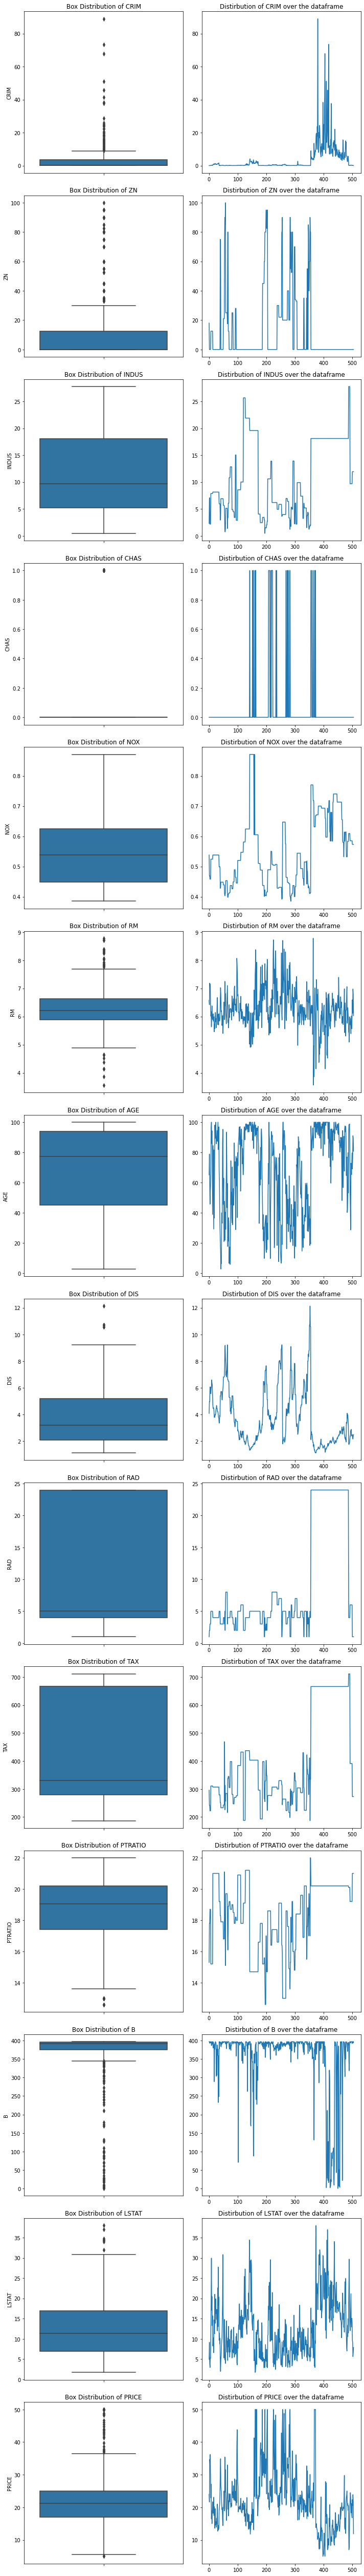

In [ ]:
plot_numerical_box(df, numerical)

<Figure size 5040x360 with 0 Axes>

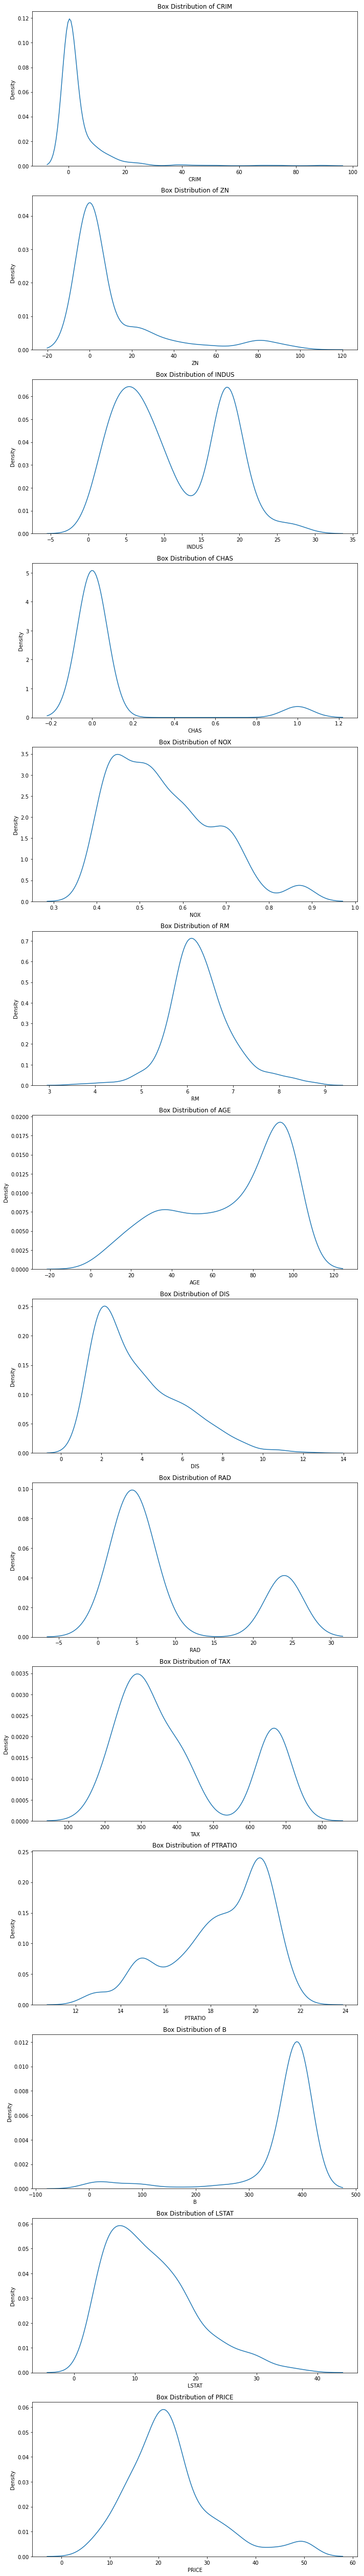

In [ ]:
plot_numerical_KDE(df, numerical)

In [ ]:
plot_categorical_countplot(df, categorical)

No categorical features to plot


STEP 7 plot inner correlations

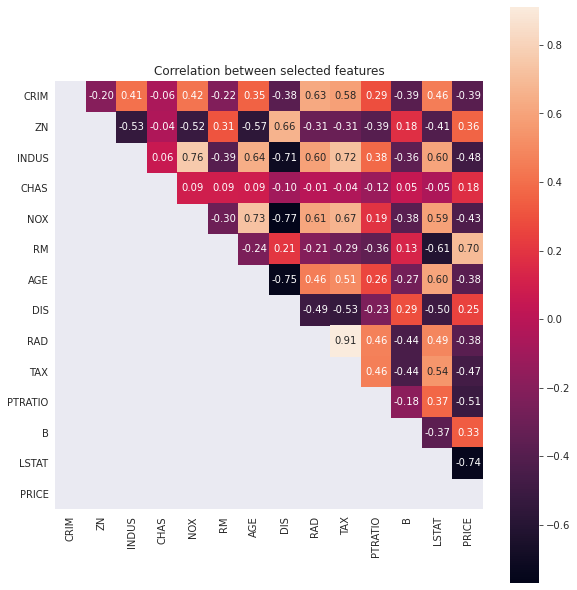

In [ ]:
plot_corr(df, numerical)

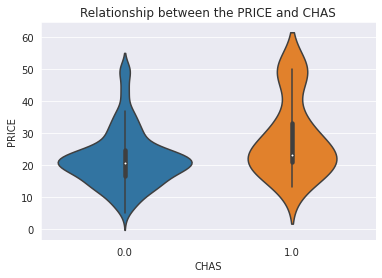

In [ ]:
categorical_numerical_corr(df, 'PRICE', 'CHAS')

STEWP 8 corraltion to the target value

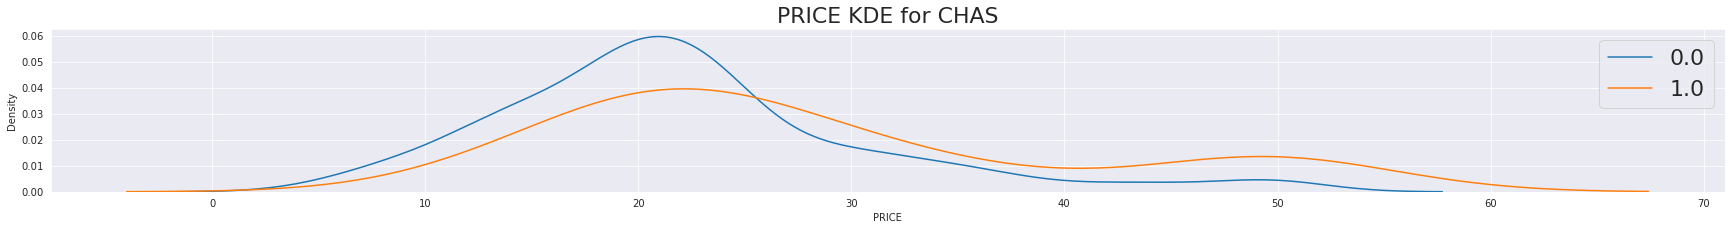

In [ ]:
numerical_categorical(df, target, 'CHAS')

In [ ]:
def numerical_numerical(df, numerical1, numerical2):
    sns.jointplot(x=numerical1, y=numerical2, data=df, kind='reg')
    plt.tight_layout()
    plt.title(f'Relationship between {numerical1} to {numerical2}', y=1.3)
    plt.show()

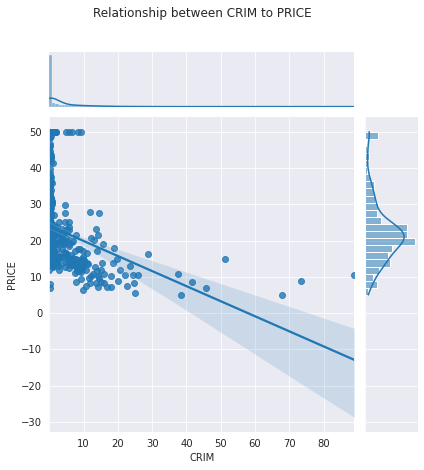

In [ ]:
numerical_numerical(df, 'CRIM', 'PRICE')

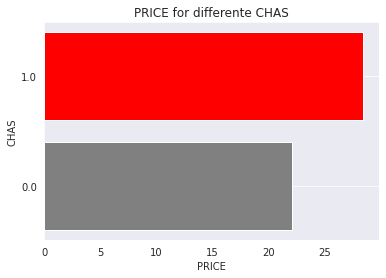

In [ ]:
numerical_categorical_bars(df, 'PRICE', 'CHAS')

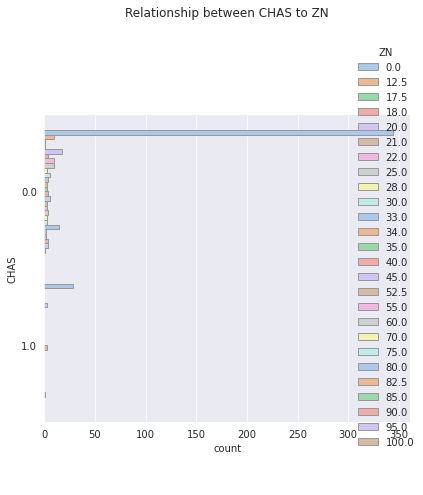

In [ ]:
categorical_categorical(df, 'CHAS', 'ZN')

In [ ]:
def 